In [29]:
import numpy as np
import cv2
import imutils
import datetime
import matplotlib.pyplot as plt

In [30]:
gun_cascade = cv2.CascadeClassifier("D:\\Downloads\\Weapon_cascade.xml")

Gun detected!


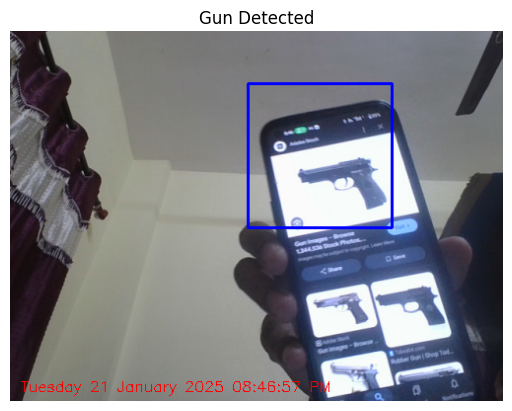

In [31]:
if gun_cascade.empty():
    print("Error: Unable to load cascade classifier. Check the file path.")
    exit()

camera = cv2.VideoCapture(0)
if not camera.isOpened():
    print("Error: Unable to access the camera.")
    exit()

gun_detected = False

while True:
    ret, frame = camera.read()
    if not ret or frame is None:
        print("Error: Unable to read from camera.")
        break

    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    guns = gun_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=20, minSize=(100, 100))
    for (x, y, w, h) in guns:
        gun_detected = True
    
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

    cv2.putText(
        frame,
        datetime.datetime.now().strftime("%A %d %B %Y %I:%M:%S %p"),
        (10, frame.shape[0] - 10),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.5,
        (0, 0, 255),
        1,
    )

    cv2.imshow("Security Feed", frame)

    if gun_detected:
        print("Gun detected!")
    
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title("Gun Detected")
        plt.axis("off")
        plt.show()
        break

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

In [32]:
camera.release()
cv2.destroyAllWindows()